In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('trainset.csv')

In [3]:
df_test = pd.read_csv('testset.csv')

In [4]:
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [5]:
trainset = df_train.iloc[:,1:2].values
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [9]:
x_train = []
y_train = []
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
x_train.shape

(1199, 60)

In [10]:
 x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [11]:
 regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0745
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0043
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0037
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0038
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0038
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0044
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0038
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0032
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0043
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0039
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0038
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0032
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0035
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0031
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - lo

In [13]:
real_stock_price = df_test.iloc[:,1:2].values
dataset_total = pd.concat((df_train['Open'],df_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [14]:
inputs = dataset_total[len(dataset_total) - len(df_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [15]:
inputs = inputs.reshape(-1,1)
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [16]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [17]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [18]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape


(125, 60, 1)

In [19]:
predicted_price = regressor.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [20]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1076.9766],
       [1075.1307],
       [1076.354 ],
       [1082.9631],
       [1092.8326],
       [1103.2168],
       [1112.3153],
       [1117.0934],
       [1119.1841],
       [1119.4692],
       [1123.0016],
       [1128.3019],
       [1133.9993],
       [1138.7805],
       [1142.8333],
       [1148.9546],
       [1158.266 ],
       [1167.3333],
       [1174.2529],
       [1178.7094],
       [1180.0645],
       [1179.9238],
       [1178.5697],
       [1171.865 ],
       [1158.6228],
       [1136.0042],
       [1117.8091],
       [1105.926 ],
       [1095.0652],
       [1088.7169],
       [1086.5999],
       [1087.3438],
       [1092.772 ],
       [1101.3094],
       [1109.534 ],
       [1117.0459],
       [1123.854 ],
       [1128.4626],
       [1132.5865],
       [1137.9481],
       [1141.1122],
       [1139.7733],
       [1128.7881],
       [1115.9287],
       [1109.6077],
       [1109.13  ],
       [1115.0881],
       [1126.441 ],
       [1142.073 ],
       [1157.6067],


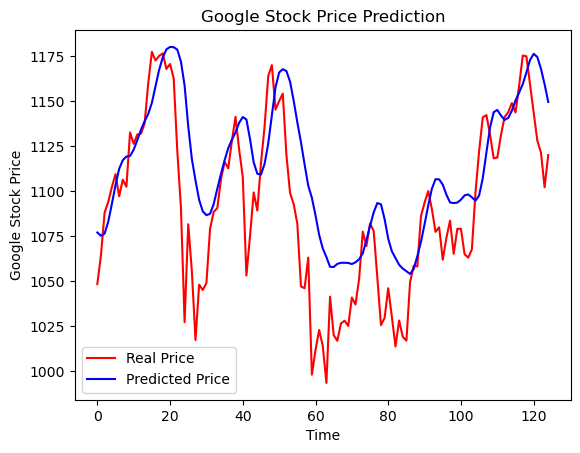

In [21]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()